In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.input').show();
 $('div.output_stderr').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action='javascript:code_toggle()'><input STYLE='color: #4286f4'
type='submit' value='Click here to toggle on/off the raw code.'></form>''')

# A mikroszkóp vizsgálata
                 (8. mérés)

# A mérés célja

Az objektív nagyításának mérése, az objektív fókusztávolságának mérése, a numerikus apertúra meghatározása és lencse görbületi sugarának mérése Newton-gyűrűk alapján.

# A mérés rövid leírása

Az objektív nagyítását az objektív-mikrométer és az okulár-mikrométer használatával mérem meg. Így lemérem a tárgy és képtávolságokat. A fókusztávolságot egy tubushosszabbító segítségével mérem. A nagyítást még egyszer le kell mérni és ezután már számolható a fókusztávolság. A numerikus apertúra meghatározásához előbb ki kell számolni a félnyílásszöget egy olyan távolság alapján, ami azt mutatja meg, hogy a tárgyasztalon a pengét mennyivel kell elmozdítani, amíg a penge éle áthalad a képmezőn. Illetve szerepet játszik a magasítólap magassága is. Végül a lencse görbületi sugarát egy adott hullámhosszú lámpa használatával mérem. Meg kell adni az okulárskálán lemért átmérők bal és jobb oldali végpontjainak értékét. Ezekre egyenest illesztek és a meredekségből kapom meg a sugarat.

# Eszközök

Mikroszkóp, penge, lencsék, tubushosszabbító, objektív-mikrométer, okulár, okulár-mikrométer.

# Hibaforrások
Kezelési hiba, leolvasási hiba, koszolódás, kerekítés, az elméleti levezetés alatt használt esetleges egyszerűsítés.

# Kiértékelés

# Objektív nagyításának mérése

Az objektív nagyítását az alábbi összefüggéssel számíthatom:

$N=\frac{K}{T}$, ahol K a képtávolság, T a tárgytávolság.

# Objektív fókusztávolságának mérése

A tubushosszabító hossza: $L$

Újra ki kell számolni a nagyítást az előző módon az új adatsorra, utána pedig a fókusztávolságot az alábbi összefüggéssel számolom:

$f=\frac{L}{N_2-N_1}$

# Numerikus apertúra mérése

Először meg kell határozni a félnyílásszöget, amit az alábbi összefüggés ad meg:

$u=\arctan{\frac{a}{2h}}$, ahol a az objektívek távolsága és h a magasítólap magassága.

Ezután a numerikus apertúra:
$A=n*sin{u}$, ahol n a levegő törésmutatója $n=1$

# Görbületi sugár mérése Newton-gyűrűk alapján

Két mérés történt. Az elsőben csak egy domborúra, míg a másodikban egy domború és homorú lencse egymásra helyezett kettősére lettek felvéve az adatok.
A gyűrűk valódi sugara:
$r_k=\frac{x_{jobb}-x_{bal}}{2N}$, ahol x a fény elmozdulása az adott tartományon.

Ennek a négyzetét kell ábrázolni a gyűrűk k sorszámának függvényében. Az egyenes meredekségéből pedig megkapom a görbületi sugarat a hullámhossz segítségével:
$R=\frac{m}{\lambda}$, ahol m a meredekség és $\lambda$ a fény hullámhossza.

A lencsekettősnél viszont így csak egy effektív sugarat kaphatok meg. A homorú lencse görbületi sugara:
$R_h=\frac{R_d*R_{eff}}{R_{eff}-R_d}$

# Példakód az egyenes illesztésére

In [8]:
%pylab inline
from scipy.optimize import curve_fit

x = array([1,2,3,4,5,6,7,8,9]) #adatsor
y = array([6,8,9,11,15,17,18,20,25])

def f(x,a,b): #Egyenes egyenlete
    return a*x+b

popt,pcov=curve_fit(f,x,y) # az illesztés elvégzése
perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
print (['a','b'])
print (popt)
print (perr)

Populating the interactive namespace from numpy and matplotlib
['a', 'b']
[2.26666667 3.        ]
[0.1356934  0.76358941]


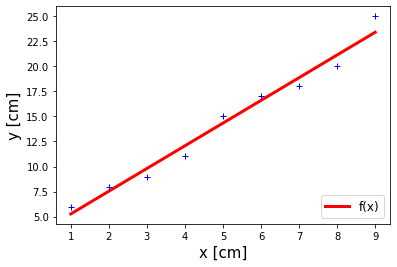

In [10]:
#Ábrázolás
plot(x,f(x,popt[0],popt[1]), label='f(x)', color='r',linewidth=3)
plot(x, y, 'b+')
xlabel('x [cm]', fontsize=15)
ylabel('y [cm]', fontsize=15)
legend(loc='lower right',fontsize=12)

# Diszkusszió

Mindegyik mérésre a hibaszámítás törvényei szerint elfogadható hibaértékeket kell kapni és az egyenes illesztésének is aránylag pontosnak kell lennie. A görbületi sugárnál be kell bizonyítani, hogy a homorú lencse sugarának hibaértéke a hibaöröklődéssel igencsak nő.

# Forrás

A mikroszkóp vizsgálata (Havancsák Károly) fejezete a laborjegyzetnek.